## Supervised Learning
## Project: Finding Donors for *CharityML*

## Getting Started

In this project, several supervised algorithms will be employed to accurately model individuals' income using data collected from the 1994 U.S. Census. Then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. The goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data.

In [6]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.sample(20))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
36971,47,Private,HS-grad,9.0,Separated,Machine-op-inspct,Not-in-family,White,Male,0.0,0.0,44.0,United-States,<=50K
2200,20,Private,HS-grad,9.0,Never-married,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,45.0,United-States,<=50K
28954,63,Private,Some-college,10.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,4386.0,0.0,40.0,United-States,>50K
4392,59,Local-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,38.0,United-States,<=50K
38970,32,Private,HS-grad,9.0,Never-married,Transport-moving,Not-in-family,White,Male,0.0,0.0,65.0,United-States,<=50K
21583,45,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,55.0,United-States,>50K
42790,39,Private,Some-college,10.0,Married-civ-spouse,Sales,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
33362,46,Private,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,1977.0,50.0,United-States,>50K
22200,29,Federal-gov,Some-college,10.0,Never-married,Other-service,Not-in-family,White,Female,0.0,0.0,40.0,United-States,>50K
6794,42,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, the following is computed:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.


In [7]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [90]:
print(df['income'].value_counts())

<=50K    34014
>50K     11208
Name: income, dtype: int64


In [91]:
df['income'] = df['income'].map({'<=50K':0, '>50K':1})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null int64
dtypes: float64(4), int64(2), object(8)
memory usage: 4.8+ MB


In [92]:
df.query('income ==0').shape[0]
df.query('income ==1').shape[0]

11208

In [93]:

n_records = df.shape[0]


n_greater_50k = df.query('income ==1').shape[0]


n_at_most_50k = df.query('income ==0').shape[0]

greater_percent = (n_greater_50k / n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 0.2478439697492371%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

D:\Work\Github\Machine Learning Project\visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


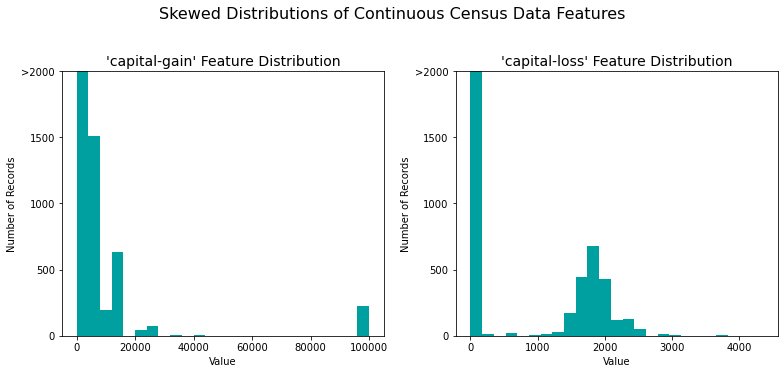

In [8]:
# Split the data into features and target label
income_raw = df['income']
features_raw = df.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(df)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

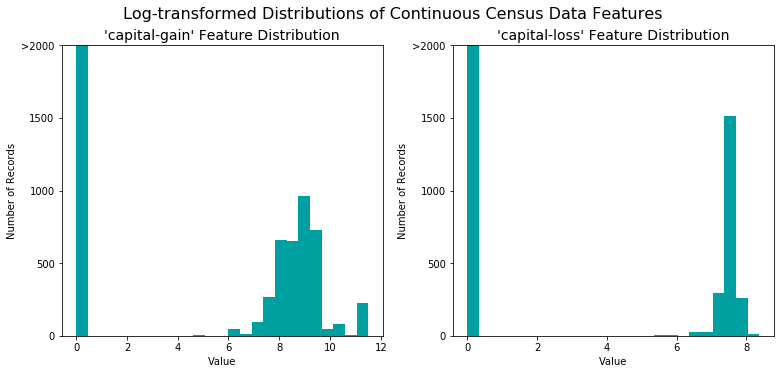

In [95]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [96]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively.

In [97]:

features_final = pd.get_dummies(features_log_minmax_transform)



# it is already done in a previous step
income = income_raw
# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
# print encoded

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [98]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


*Note: this Workspace is running on `sklearn` v0.19. If you use the newer version (>="0.20"), the `sklearn.cross_validation` has been replaced with `sklearn.model_selection`.*

----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 



For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

###  Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? 


In [99]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# Calculate accuracy, precision and recall
tn, fn, tp, fp = 0,0,n_greater_50k,n_at_most_50k
accuracy = (tp+tn)/(tp+tn+fn+fp)
recall = (tp)/(tp+fn)
precision = (tp)/(tp+fp)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1+beta**2) * (precision * recall)/((beta**2 *precision) * recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.6223]


###  Supervised Learning Models


### Model Application
Three supervised learning models above that are appropriate for this problem have been choosen with a brief description covering those 3 points for each given:

- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

> Gaussian Naive Bayes

- advantages
    - requires small training data to predict accurately
    - results can be easily interpreted as it is probabilistic in nature
    - it is faster than other classifiers 
    - low variance
- weakness
    - assumes features are independant of each other
    - high bias
- why good candidate ?
    - Naive Bayes excels when features are mostly categorical
    - it is unhindered by small training data even if there are a lot of features
    - if feature independance holds true it will be faster and give very accurate results than other classifiers
#### Reference: https://en.wikipedia.org/wiki/Naive_Bayes_classifier

> Random Forest
- advantages
    - low variance and increased accuracy than single decision trees
    - handle both continous and categorical features with ease
    - isn't affected by outliers alot 
    - can deal with complex data 
- weakness
    - higher bias than single trees
    - hard to interpret
    - may not increase the accuracyy of the weak learner if featuers are linearly correlated with output or there are many classifications  
- why good candidate ?
    - will give good accuracy as it uses bootstrapping which overcomes problem of small training data
    - handle both continous and categoricall data efficiently and isn't affected by outliers (like in capital loss and gain)
    - can find complex realtions between the features easily
#### Reference: https://en.wikipedia.org/wiki/Random_forest

> SVM
- advantages
    - can handle linear and non-linear data using kernal trick
    - alot of hyperparameters and kernals
    - excels when the dataset isn't large 
- weakness
    - takes more computational power to train
    - choice of correct kernal and hyperparameters isn't easy
    - hard to interpret 
- why good candidate ?
    - works well in higher dimensions
    - can be fine tuned to fit the data and generalize well through careful hyperparameter tuning
#### Reference: https://en.wikipedia.org/wiki/Support-vector_machine

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model , it's important to create a training and predicting pipeline that allows to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. the implementation here will be used in the following section.
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.

In [100]:
X_train.sample(10,random_state=42)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
31378,0.328767,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
41675,0.273973,0.533333,0.000000,0.0,0.397959,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27887,0.575342,0.800000,0.000000,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41221,0.849315,0.200000,0.000000,0.0,0.040816,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
40951,0.410959,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6440,0.520548,0.800000,0.777174,0.0,0.377551,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29897,0.287671,0.600000,0.000000,0.0,0.357143,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
29086,0.246575,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
41152,0.438356,0.666667,0.000000,0.0,0.602041,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
22079,0.136986,0.466667,0.000000,0.0,0.551020,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [101]:
y_train.sample(10,random_state=42)

31378    0
41675    1
27887    0
41221    0
40951    0
6440     1
29897    1
29086    0
41152    0
22079    0
Name: income, dtype: int64

In [102]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    X_train = X_train.sample(sample_size,random_state=42)
    y_train = y_train.sample(sample_size,random_state=42)
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train,y_train)
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    #  Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train.iloc[:300,:]) if X_train.shape[0] >=300 else learner.predict(X_train)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    #  Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300] if len(y_train) >= 300 else y_train,predictions_train)
    #  Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300] if len(y_train) >= 300 else y_train,predictions_train,0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation



GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.


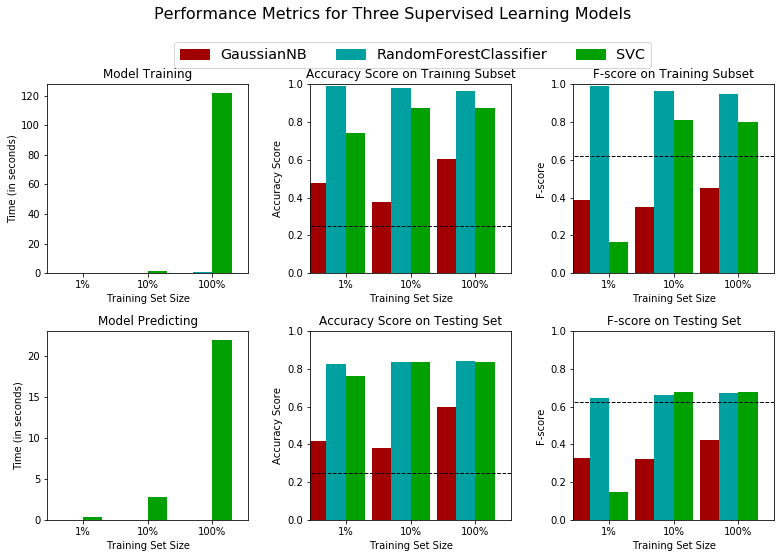

In [103]:
# Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize the three models
# gaussianNB doesn't have a random_state attriibute
clf_A = GaussianNB()
clf_B = RandomForestClassifier(random_state=42)
clf_C = SVC(random_state=42)

# Calculate the number of samples for 1%, 10%, and 100% of the training data

samples_100 = len(y_train)
samples_10 = int(len(y_train) * 0.1)
samples_1 = int(len(y_train) * 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [104]:
results

{'GaussianNB': {0: {'train_time': 0.0014984607696533203,
   'pred_time': 0.017117023468017578,
   'acc_train': 0.47666666666666668,
   'acc_test': 0.41868435599778886,
   'f_train': 0.3891050583657587,
   'f_test': 0.3266448130856594},
  1: {'train_time': 0.0052607059478759766,
   'pred_time': 0.009662866592407227,
   'acc_train': 0.37666666666666665,
   'acc_test': 0.37822001105583197,
   'f_train': 0.34843205574912894,
   'f_test': 0.32430549244145535},
  2: {'train_time': 0.08853888511657715,
   'pred_time': 0.015797853469848633,
   'acc_train': 0.60333333333333339,
   'acc_test': 0.59767827529021555,
   'f_train': 0.45023696682464454,
   'f_test': 0.42089895957560558}},
 'RandomForestClassifier': {0: {'train_time': 0.01615738868713379,
   'pred_time': 0.01313471794128418,
   'acc_train': 0.98999999999999999,
   'acc_test': 0.82553897180762847,
   'f_train': 0.99226804123711343,
   'f_test': 0.64322139901857023},
  1: {'train_time': 0.056143760681152344,
   'pred_time': 0.0213189125

----
## Improving Results
In this final section, we will choose from the three supervised learning models the *best* model to use on the data. we will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Choosing the Best Model




>The Random Forest model has is the most appropiate models of the selected models above of identifying individuals that make more than $50,000. The reason is very simple and straightforward, the random forest is better or equal than the other models in every metric in every sample of the data. the naive bayes has extremely low accuracy and f1-score so it is not considered at all.

>SVM on the other hand has very similar f1 score and accuracy on the testing dataset when compared to random forest when all the dataset is used in training. When it concerns the training set however it is clear it is underfitting when compared to the random forrest. The biggest drawback of the SVM is that it takes significantly more time to train than random forrest (orders of magnitude higher). Thus, it is clear that the random forrest model is very suitable for the model due to the various categories that can translate into nodes and trees efficiently and effectively in the random forrest model.

### Describing the Model in Layman's Terms


> The Random Forrest model is the final model chosen. The model is trained by using all features of the dataset (such as income and gender) to determine wheather an individual will earns more than \\$50000 dollars or not. It does this through a divide and conquer approach. By splitting dataset into alot of nodes it can identify wheather an individual is more likely to earn more than \\$50,000 or not. A node is just a mix of different features that when put together indicates the likelihood of individual earning more than \\$50,000. for example, it might be that females, aged between 26-36 who are not working, have a family with higher education than bachelor doesn't earn more than \\$50,000 on average. another node might be males, age 40-50 who are working as exec-mangerial with capital gain >5000 are more likely to earn more than \\$50,000.

> Now the model well not just use 5 or 6 features like the previous examples. it might use hundreds of the features available which will give very complex nodes and branches as you can imagine the complexity. The model can do this by multiple approaches but essentially all of them are optimized to maximize the amount of inforamtion in each node so that it can give an accurate predictions. Now you might ask but what if multiple nodes are not working correctly, wouldn't that make the model fail ? Here comes the beauty of the random forrest. Alot of nodes toghether form a tree with lots of branches to different combinations of features (aka nodes). Now what happens if you make hundereds of such trees instead of just depending on the output of a single node you do something like a voting system where each tree gets a say in the final outcome. as you can imagine this significantly improves the quality of predictions as the number of feature combinations that are being considered now are much higher and by voting it eleminates the chance of an anomaly node ruining the model. 


### Implementation: Model Tuning
>Fine tune the chosen model using grid search (`GridSearchCV`)

In [105]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
# Initialize the classifier
clf = RandomForestClassifier()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators':[100,200,300],
             'min_samples_split':[2,4],
             'min_samples_leaf':[1,2]}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters,scoring =scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8395
F-score on testing data: 0.6762

Optimized Model
------
Final accuracy score on the testing data: 0.8628
Final F-score on the testing data: 0.7363


###  Final Model Evaluation

* What is the optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from the optimized model compare to the naive predictor benchmarks  found earlier?_  


#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |         0.8395          |       0.8628          |
| F-score        |         0.6762        |   0.7363       |


- The optimized model's accuracy and f-score are both higher than the unoptimized model
- the model accuracy is significantly better than the naive predictor and the f-score is also better 

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

###  Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which features are hypothesised to be most important for prediction, and in what order would they be ranked  and why?

- Capital-gain: if the capital gain is high enough there is almost no need to look at any other metric thus  it is the most important
- Capital-loss: if capital-loss is very high there is a big chance he doesn't earn alot
-  Age: if a person is young he probably doesn't have a lot of money unlike when he gets older in the mid thirties and forties
-  Education: the higher the education the more chance he has more income
-  Occupation: some occupation should have higher income than others which should be a very useful metric

### Implementation - Extracting Feature Importance
By choose `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it (which randomforest happens to have), exrtating feature importance becomes very easy. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.


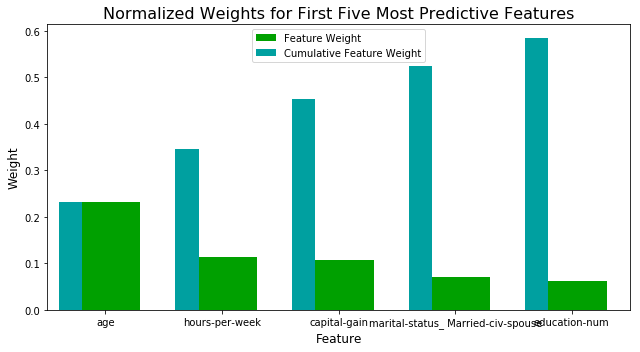

In [108]:
# Extract the feature importances using .feature_importances_ 
importances = best_clf.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features  discussed earlier?


- 3 of them are similar to earlier predictions (age, capital-gain, and education-num)
- the other 2 are martial-status and hours-per-week

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [109]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8628
F-score on testing data: 0.7363

Final Model trained on reduced data
------
Accuracy on testing data: 0.8434
F-score on testing data: 0.6876


###  Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?

- the final model accuracy using the reduced data have only 2% drop in accuracy but a 5% percent drop in f_score so it is worse
